In [271]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import uproot
import awkward as ak
import vector
vector.register_awkward()

hep.style.use('ATLAS')  # or ATLAS/LHCb2
pd.set_option('display.max_columns', None)

In [318]:
fTrkAna='/mu2e/app/users/oksuzian/trkana_042023/nts.owner.trkana-reco.version.sequencer.root'
trkana = uproot.open(fTrkAna+":TrkAnaExt/trkana")
arr = trkana.arrays()

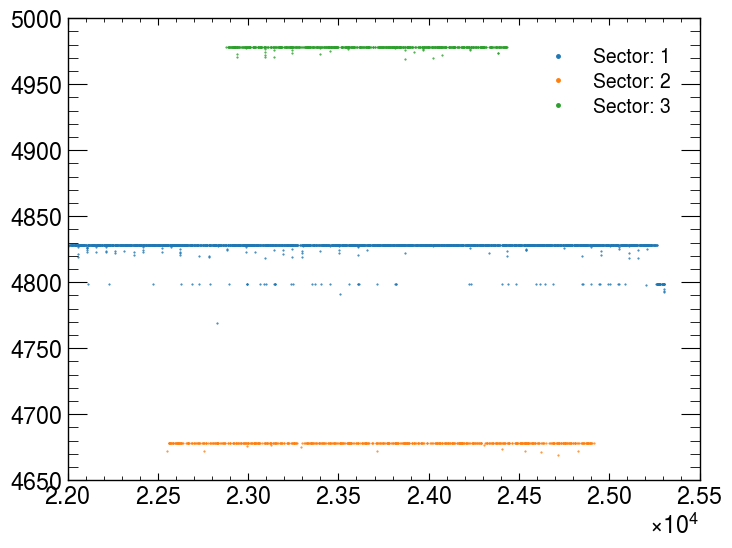

In [229]:
for sector in (1,2,3):
    ar_ = arr[['crvinfomc._x', 'crvinfomc._y', 'crvinfomc._z'], (arr['crvinfo._crvSectorType'] == sector) ]
    plt.plot(ak.flatten(ar_['crvinfomc._z']), ak.flatten(ar_['crvinfomc._y']), '.', markersize=1, label='Sector: %d'%sector);
plt.legend(markerscale=5);

In [319]:
#arr = arr[arr['kl.nactive']>1]
#arr = arr[arr['kl.status']>0]

#Select only entries with coincidence in any CRV modules 
ar_trig_all = arr[ak.any(arr['crvinfo._crvSectorType'] > 0, axis=1)]
#Select only entries with coincidence in _crvSectorType==2 (bottom) or _crvSectorType==3 (top) 
ar_trig = arr[ak.any(arr['crvinfo._crvSectorType'] > 1, axis=1)]
#Print only entries without coincidence in _crvSectorType==1 (middle)
ar_fail = ar_trig[ak.all(ar_trig['crvinfo._crvSectorType'] != 1, axis=1)][['evtinfo.eventid', 'evtinfo.subrunid']]
ar_fail

<Array [{'evtinfo.eventid': 17094, ...}, ...] type='9 * {"evtinfo.eventid":...'>

In [314]:
nFail = len(ar_fail)
nTrig = len(ar_trig)
nTrig_all = len(ar_trig_all)
print("Number of events that are detected by any sectors: %d"%nTrig_all)
print("Number of events that are detected by sectors 2 or 3 (outside): %d"%nTrig)
print("Number of events that are not vetoed by sector 1 (middle): %d"%nFail)
print("CRV efficiency: %f"%(1-nFail/nTrig))

Number of events that are detected by any sectors: 1657
Number of events that are detected by sectors 2 or 3 (outside): 597
Number of events that are not vetoed by sector 1 (middle): 5
CRV efficiency: 0.991625


In [358]:
momentum = ak.zip({"px": arr['klmid.mom.fCoordinates.fX'], 
                   "py": arr['klmid.mom.fCoordinates.fY'], 
                   "pz": arr['klmid.mom.fCoordinates.fZ'],}, with_name="Momentum3D")

momentum_crv = ak.zip({"px": ar_trig_all['klmid.mom.fCoordinates.fX'], 
                       "py": ar_trig_all['klmid.mom.fCoordinates.fY'], 
                       "pz": ar_trig_all['klmid.mom.fCoordinates.fZ'],}, with_name="Momentum3D")

momentum_crv_pri = ak.zip({"px": ar_trig_all['klmcpri.mom.fCoordinates.fX'], 
                           "py": ar_trig_all['klmcpri.mom.fCoordinates.fY'], 
                           "pz": ar_trig_all['klmcpri.mom.fCoordinates.fZ'],}, with_name="Momentum3D")

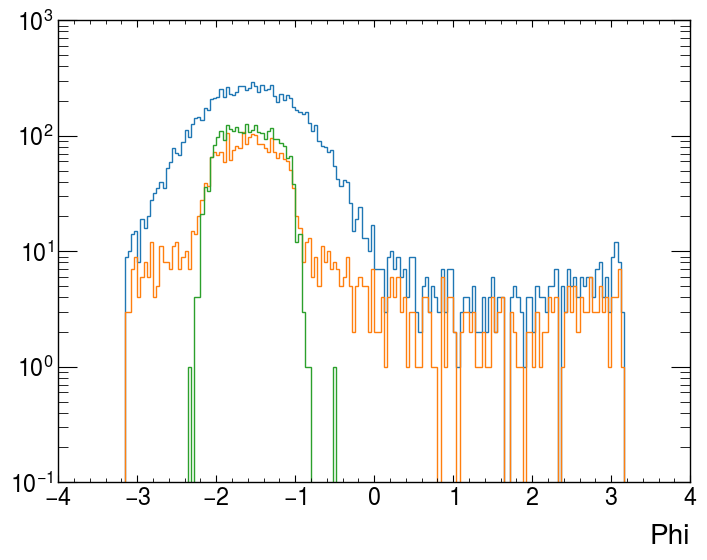

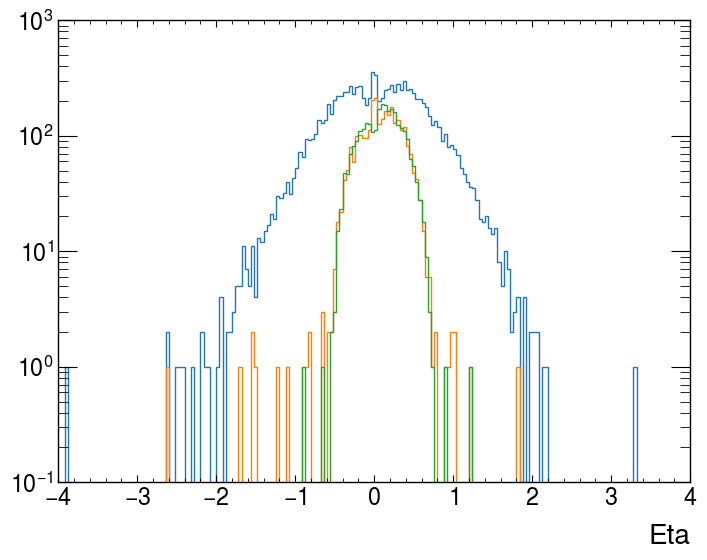

In [361]:
def plot_hists(momentum_list, values, range_, xlabel):
    plt.figure()
    for momentum in momentum_list:
        plt.hist(values(momentum), bins=200, range=range_, histtype='step');
    plt.yscale('log')
    plt.xlabel(xlabel)

plot_hists([momentum, momentum_crv, momentum_crv_pri], lambda obj: obj.phi, (-4,4), "Phi")
plot_hists([momentum, momentum_crv, momentum_crv_pri], lambda obj: obj.eta, (-4,4), "Eta")

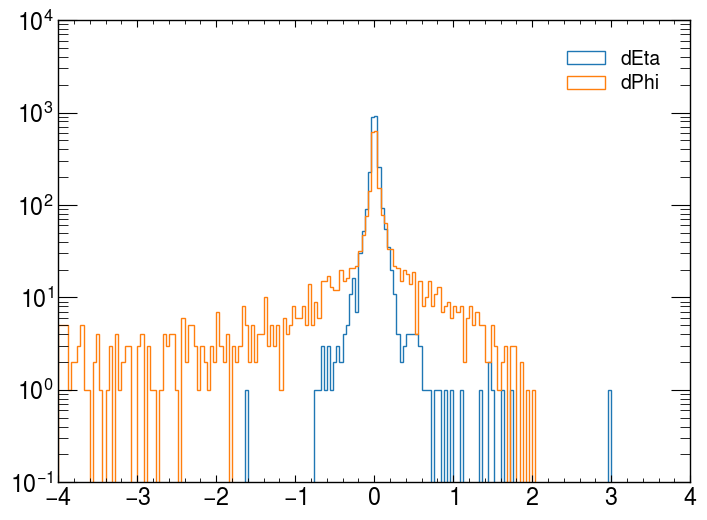

In [362]:
plt.hist(momentum_crv_pri.eta-momentum_crv.eta, bins=200, range=(-4,4), histtype='step', label='dEta');
plt.hist(momentum_crv_pri.phi-momentum_crv.phi, bins=200, range=(-4,4), histtype='step', label='dPhi');
plt.yscale('log')
plt.legend();